In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Replace with your actual file URL
url = "/content/data (1).csv"

# Load CSV
df = pd.read_csv(url)
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0


clean and formatting

In [2]:
# Format categorical and binary features
df['Vehicle_Age'] = df['Vehicle_Age'].replace({
    '> 2 Years': 'Over 2 Years',
    '1-2 Year': '1-2 Years',
    '< 1 Year': 'Under 1 Year'
})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].astype('category')
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df['Previously_Insured'] = df['Previously_Insured'].astype('bool')
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,False,Over 2 Years,1,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,False,1-2 Years,0,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,False,Over 2 Years,1,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,True,Under 1 Year,0,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,True,Under 1 Year,0,27496.0,152.0,39.0,0.0


Q1: 📌 What’s the gender-wise distribution of buyers?

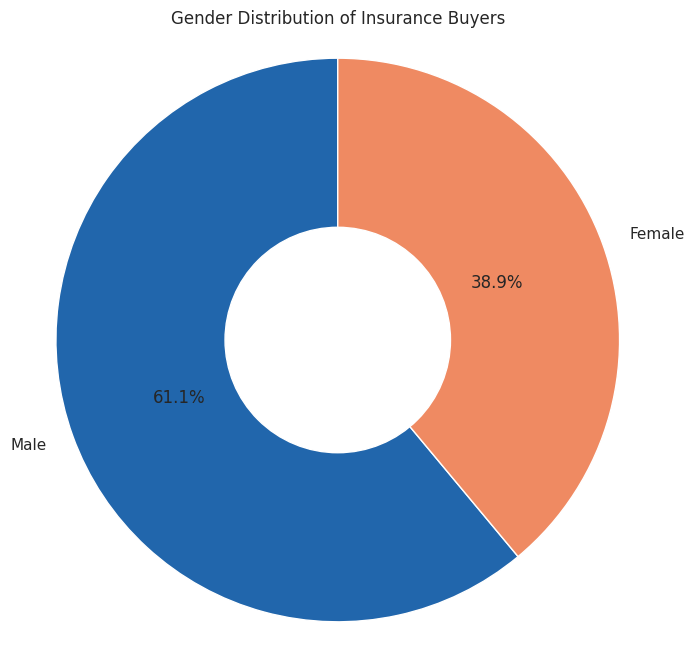

In [5]:
import matplotlib.pyplot as plt

# Filter only buyers (Response == 1)
gender_counts = df[df['Response'] == 1]['Gender'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie chart - remove shadow parameter or set it to False
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
       startangle=90, shadow=False,  # Changed shadow to False
       colors=['#2166ac', '#ef8a62'])  # Using RdBu-like colors

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Gender Distribution of Insurance Buyers')

# Display the figure
plt.show()

Q2: Age-wise purchase tendency

In [ ]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65, 85],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-85'])

# Count buyers by age group
age_group_response = df[df['Response'] == 1]['Age_Group'].value_counts().sort_index().reset_index()
age_group_response.columns = ['Age_Group', 'Buyers']

# Plot
fig = px.bar(age_group_response, x='Age_Group', y='Buyers', color='Buyers',
             title='Number of Insurance Buyers by Age Group',
             text='Buyers', color_continuous_scale='Blues')
fig.update_layout(showlegend=False)
fig.show()


Q3: Which vehicle age groups are converting better?

In [ ]:
# Count responses by vehicle age
vehicle_age_counts = df.groupby(['Vehicle_Age', 'Response']).size().reset_index(name='Count')
vehicle_age_counts['Response'] = vehicle_age_counts['Response'].map({1: 'Purchased', 0: 'Not Purchased'})

# Plot
fig = px.bar(vehicle_age_counts, x='Vehicle_Age', y='Count', color='Response',
             barmode='group', text='Count',
             title='Insurance Purchase by Vehicle Age Category')
fig.show()


Q4: Does previous insurance affect new policy purchase?

In [ ]:
import plotly.graph_objects as go

# Data
labels = ['No Previous Insurance', 'Had Previous Insurance']
rates = [rate_no_ins, rate_had_ins]
colors = ['green' if r > 10 else 'red' for r in rates]

# Build figure
fig = go.Figure()

for i, (label, rate, color) in enumerate(zip(labels, rates, colors)):
    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=rate,
        number={'suffix': "%", 'font': {'size': 48}},
        delta={'reference': 10, 'increasing': {'color': "green"}, 'decreasing': {'color': "red"}},
        title={'text': f"<b>{label}</b>", 'font': {'size': 20}},
        domain={'row': 0, 'column': i}
    ))

fig.update_layout(
    title="✅ Insurance Purchase Rates Based on Previous Coverage",
    grid={'rows': 1, 'columns': 2, 'pattern': "independent"},
    height=300
)
fig.show()


Q5: Which sales channels bring the most conversions?

In [ ]:
# Get top 10 converting sales channels
top_channels = df[df['Response'] == 1]['Policy_Sales_Channel'].value_counts().head(10).reset_index()
top_channels.columns = ['Sales_Channel', 'Conversions']
top_channels = top_channels.sort_values(by='Conversions', ascending=True)

# Plot with highlight and text
fig = px.bar(top_channels, x='Conversions', y=top_channels['Sales_Channel'].astype(str),
             text='Conversions', orientation='h',
             color='Conversions', color_continuous_scale='Blues',
             title='Top 10 Sales Channels by Number of Conversions')

fig.update_layout(yaxis_title="Sales Channel", xaxis_title="Number of Buyers",
                  showlegend=False, height=500)
fig.show()


Q6: Do people with damaged vehicles tend to buy more insurance?

In [ ]:
# Count of buyers based on vehicle damage status
damage_response = df[df['Response'] == 1]['Vehicle_Damage'].value_counts().reset_index()
damage_response.columns = ['Vehicle_Damage', 'Buyers']
damage_response['Vehicle_Damage'] = damage_response['Vehicle_Damage'].map({1: 'Damaged', 0: 'Not Damaged'})

# Donut Pie Chart
fig = px.pie(damage_response, names='Vehicle_Damage', values='Buyers',
             hole=0.5, title='Insurance Buyers by Vehicle Damage Status',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


Q7: Are insurance buyers paying higher premiums?

In [ ]:
# Create premium buckets
bins = [0, 10000, 20000, 30000, 40000, 50000, 75000, 100000, 150000]
labels = ['<10K', '10K–20K', '20K–30K', '30K–40K', '40K–50K', '50K–75K', '75K–100K', '100K+']
df['Premium_Band'] = pd.cut(df['Annual_Premium'], bins=bins, labels=labels, right=False)

# Group data: total customers and buyers per premium range
group = df.groupby('Premium_Band').agg(
    total_customers=('Response', 'count'),
    buyers=('Response', 'sum')
).reset_index()

# Calculate purchase rate
group['Purchase_Rate'] = (group['buyers'] / group['total_customers']) * 100

# Label explanation column for hover
group['Label'] = (
    'Premium Range: ' + group['Premium_Band'].astype(str) +
    '<br>Total Customers: ' + group['total_customers'].astype(str) +
    '<br>Buyers: ' + group['buyers'].astype(str) +
    '<br>Purchase Rate: ' + group['Purchase_Rate'].round(1).astype(str) + '%'
)

# Bubble chart
import plotly.express as px
fig = px.scatter(group, x='Premium_Band', y='Purchase_Rate', size='total_customers',
                 hover_name='Label',
                 color='Purchase_Rate', color_continuous_scale='Viridis',
                 title='📍 Purchase Rate by Premium Range<br>(Bubble Size = Number of Customers)',
                 labels={
                     'Premium_Band': 'Premium Range',
                     'Purchase_Rate': 'Purchase Rate (%)',
                     'total_customers': '# of Customers'
                 })

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    yaxis_title='Conversion Rate (%)',
    xaxis_title='Premium Range (INR)',
    showlegend=False
)
fig.show()


Q8: Which regions convert the most buyers?

In [ ]:
# Top 15 converting regions
top_regions = df[df['Response'] == 1]['Region_Code'].value_counts().head(15).reset_index()
top_regions.columns = ['Region_Code', 'Buyers']
top_regions = top_regions.sort_values('Buyers')

# Add hover label to explain bubble size
top_regions['Label'] = (
    'Region Code: ' + top_regions['Region_Code'].astype(str) +
    '<br>Number of Buyers: ' + top_regions['Buyers'].astype(str) +
    '<br>(Bubble size = # of insurance buyers in that region)'
)

# Dot plot (bubble = # of buyers)
import plotly.express as px
fig = px.scatter(top_regions,
                 x='Buyers',
                 y=top_regions['Region_Code'].astype(str),
                 size='Buyers',
                 color='Buyers',
                 hover_name='Label',
                 title='📍 Top 15 Regions by Insurance Buyers<br>(Bubble Size = Number of Buyers)',
                 labels={'Region_Code': 'Region Code', 'Buyers': 'Number of Buyers'},
                 color_continuous_scale='Blues')

# Style tweaks
fig.update_traces(marker=dict(symbol='circle', line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    height=500,
    xaxis_title="Number of Insurance Buyers",
    yaxis_title="Region Code",
    showlegend=False
)
fig.show()


Q9 — What do all numerical features tell us about what drives conversion?

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract correlations with Response
response_corr = corr_matrix['Response'].drop('Response').sort_values()

# Convert to DataFrame for plotting
corr_df = response_corr.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Plot horizontal bar chart
fig = px.bar(corr_df, x='Correlation', y='Feature',
             orientation='h', text='Correlation',
             color='Correlation',
             color_continuous_scale='RdBu',
             title='How Strongly Does Each Feature Influence Purchase?')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Correlation with Purchase', yaxis_title='Feature',
                  coloraxis_showscale=False, height=500)
fig.show()
